# Research Question 3

How are the countries connected? Is there a pattern in the
way players in origin countries select special countries for
their offshores?

*For every combination of two countries that occur in the data
we count the number of offshores founded in one country
coming from the other country and vice versa.*

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Reading the data

In [2]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

In [3]:
entities.head()

,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,Country,note,valid_until,node_id,sourceID
name,,,,,,,,,,,,,,,,,,,,
"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers


The dataset contains 495038 data points, one per revealed offshore entity. In this part of the analysis we are mainly concerned with origin and goal countries of the offshore entities. The origin country can be found in the column "Country", the goal tax heaven in the column "jurisdiction_descrition". We find 518 different origin countries and 39 different goal countries.

In [4]:
len(entities)

495038

In [5]:
len(entities.Country.unique())

519

In [6]:
len(entities.jurisdiction_description.unique())

40

## Cleaning the data

A closer inspection of the data revealed that there are missing values encoded by 'Not identified', 'Undetermined', and 'Recorded in leaked files as "fund"'. We convert them to NaN. Furthermore, we observed occurences of 'United States Of America' as well as 'United States'. in order to have consistent names we rename them all to 'United States'.

In [7]:
entities.Country.replace('Not identified',np.NaN, inplace=True)
entities.jurisdiction_description.replace(['Undetermined', 'Recorded in leaked files as "fund"'],np.NaN, inplace=True)
entities.jurisdiction_description.replace('United States Of America','United States', inplace=True)

## Computing the cross table of frequencies 

As mentionned above, we want to count for every combination of two countries that occur in the data the number of offshores founded in one country coming from the other country and vice versa.
The frequencies of relations can be computed using the pandas function `crosstab`.

In [8]:
crosstable = pd.crosstab(entities.Country, [entities.jurisdiction_description], rownames=['origin'], colnames=['destination'])
crosstable.tail()

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Viet Nam,2,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Viet Nam;British Virgin Islands,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A closer observation of the country names shows that some offshore entities have more than one origin country. The countries are specified in one data row and the names are seperated by ';', see for example the origin value 'Viet Nam;British Virgin Islands'. For the analysis of the relations between origin and goal countries we decided to count such relations for all of the specified origin countries.

Therefore, we refactor the crosstable by duplicating the rows with several origin countries once for every origin country. As this might result in having more than one row per origin country, in the end we group by origin country and sum up all the values. Furthermore, we again drop the row corresponding to the country value 'Not identified'.

Furthermore, in a seperate analysis we investigate which countries occur together as origin countries.

In [9]:
multiple_orig = pd.DataFrame(columns = crosstable.reset_index().columns)
for index, row in crosstable.reset_index().iterrows():
    for orig in row['origin'].split(';'):
        multiple_orig = multiple_orig.append(pd.concat([pd.Series({'origin' : orig}), row[1:]]), ignore_index=True)
multiple_orig.head()

destination,origin,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
0,Albania,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Andorra,26,0,0,0,39,0,0,0,0,...,9,72,0,0,0,1,0,15,0,0
3,Angola,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anguilla,0,0,0,21,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
crosstable = multiple_orig.groupby('origin').sum()
crosstable.drop('Not identified')

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Albania,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Andorra,26,0,0,0,39,0,0,0,0,3,...,9,72,0,0,0,1,0,15,0,0
Angola,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anguilla,0,0,0,21,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,1,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
Argentina,23,0,0,0,83,0,0,0,0,1,...,0,6,0,0,0,0,0,0,0,0
Aruba,0,0,0,4,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,2,0,0,1,64,0,0,0,1,0,...,0,4,0,0,0,0,0,0,0,0


## Relations between origin and goal countries



In [11]:
crosstable[crosstable == 0.0] = np.nan

In [12]:
def plot_cross_table(matrix):
    '''
    Function used to plot the cross table.
    Params:
        @matrix: crosstable
    '''
    
    fig = plt.figure(figsize=(10, 10))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect('auto')
    res = ax.matshow(matrix, cmap='YlOrRd')
    
    cb = fig.colorbar(res, fraction=0.046, pad=0.04)
    
    width, height = matrix.shape
    plt.xticks(range(height), matrix.columns.values, rotation=90)
    plt.ylabel('Origin country')
    plt.xlabel('Goal country')
    plt.yticks(range(width), matrix.index.values)
   

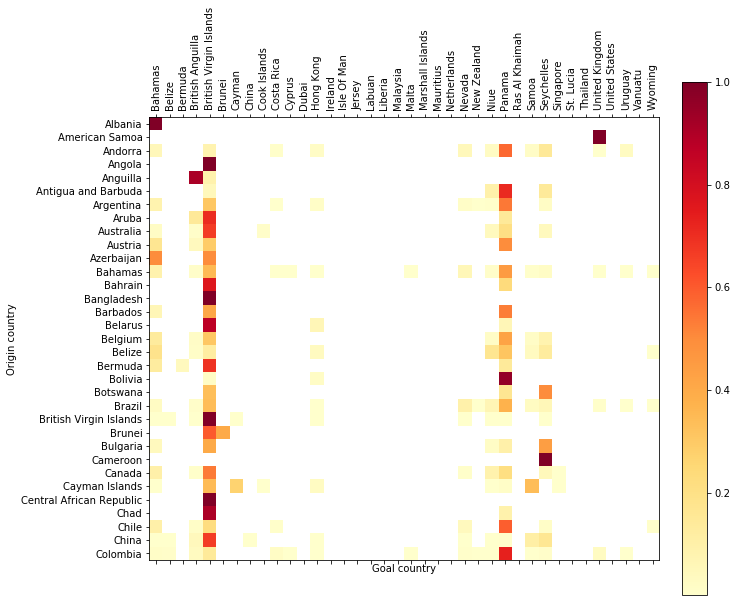

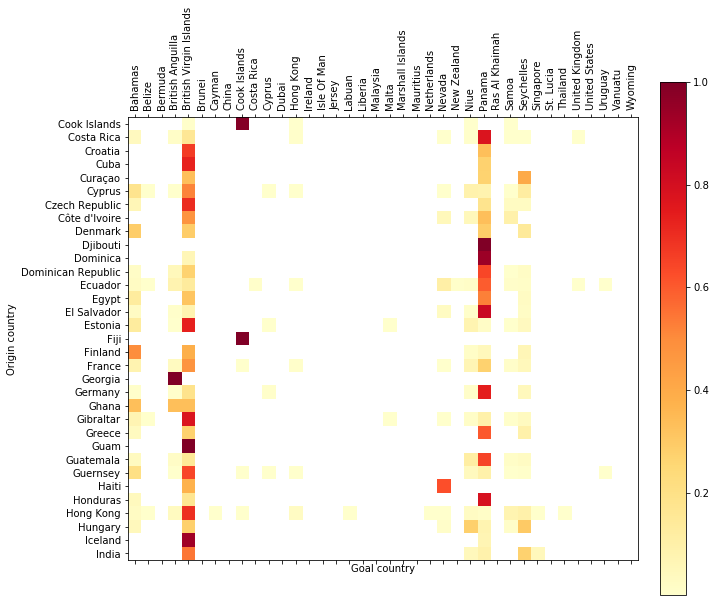

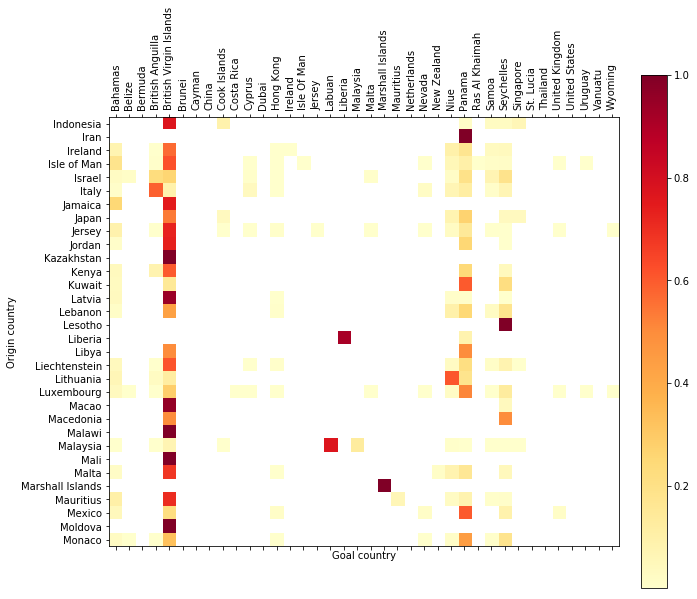

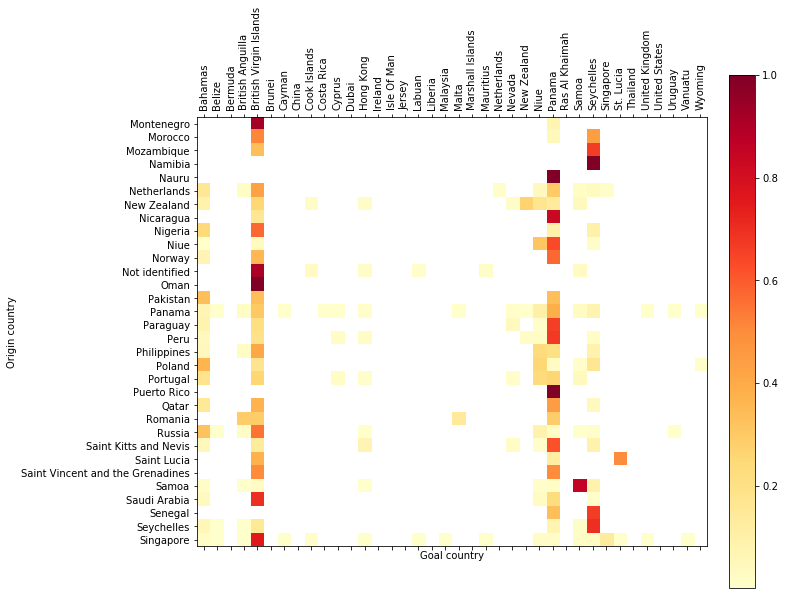

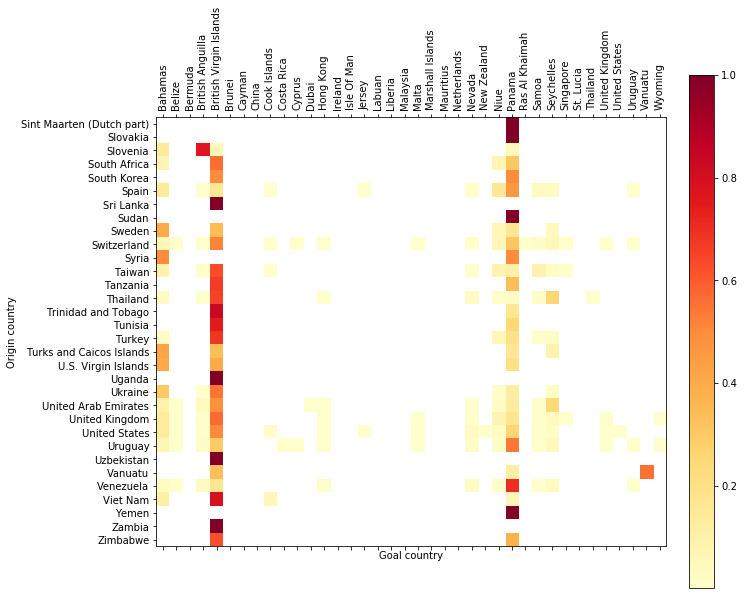

In [13]:
for m in np.array_split(crosstable.div(crosstable.sum(axis=1), axis=0), 5): plot_cross_table(m)

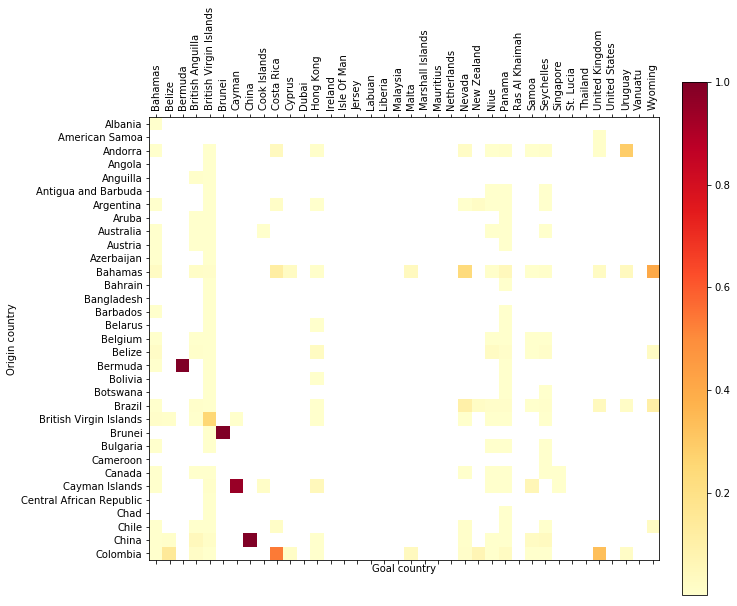

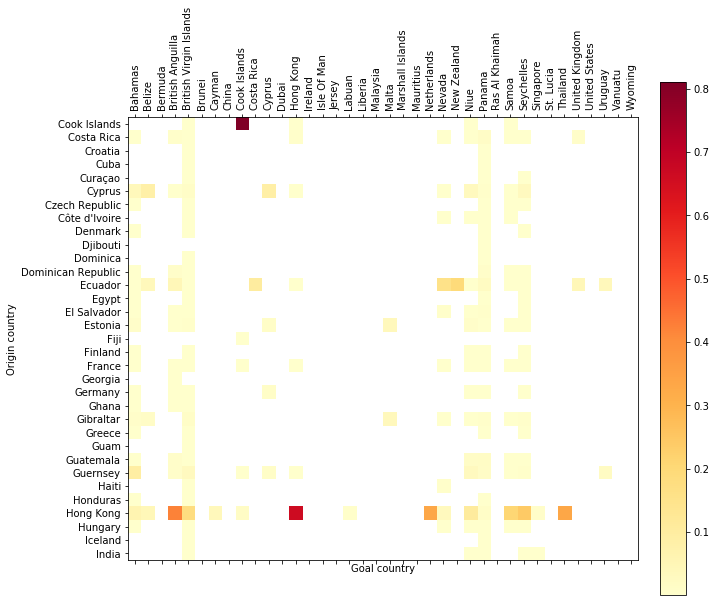

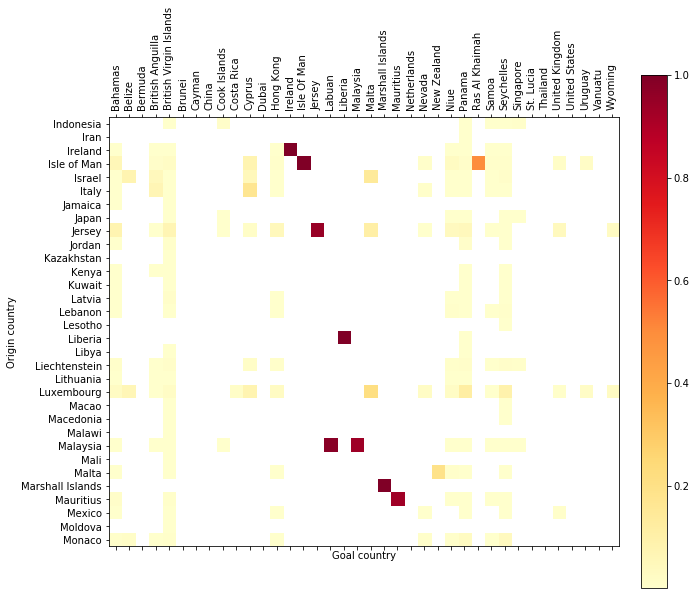

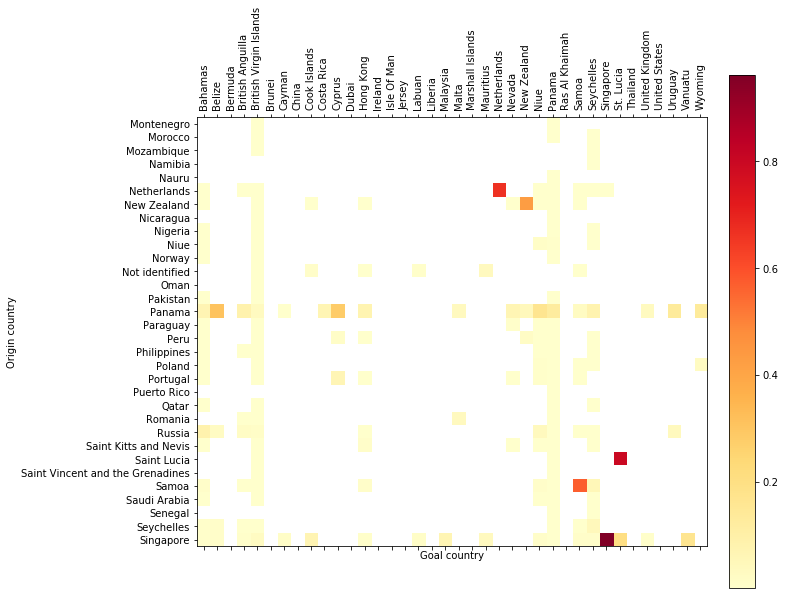

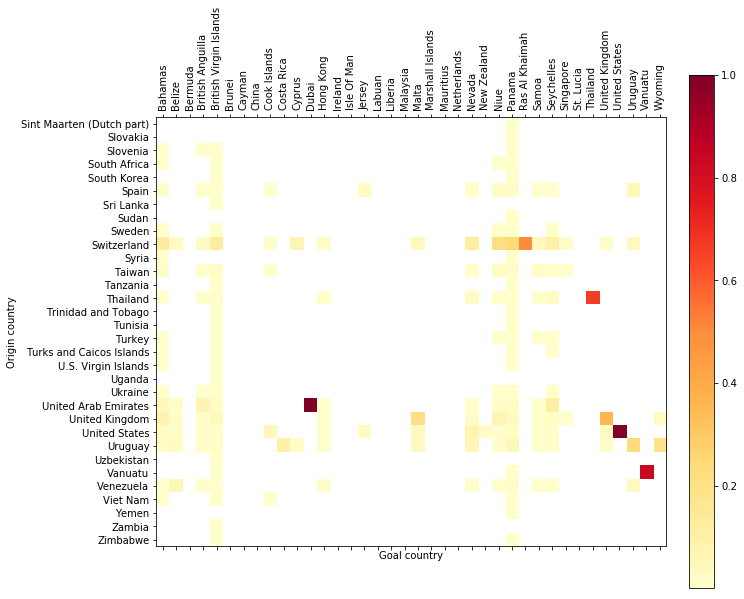

In [14]:
for m in np.array_split(crosstable.apply(lambda col: col/col.sum()), 5): plot_cross_table(m)

## Relations between origin countries

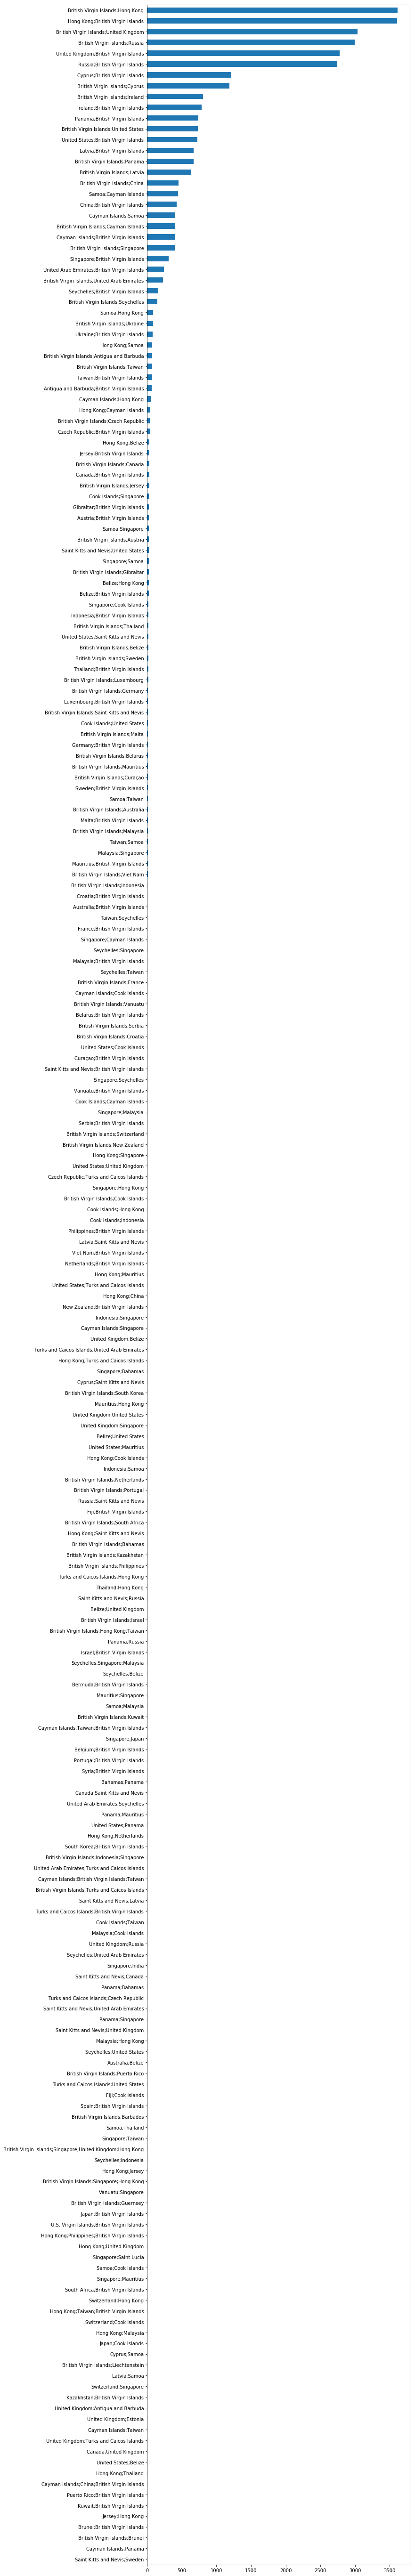

In [15]:
ax = entities.Country.dropna()[entities.Country.dropna().str.contains(';') & ~(entities.Country.dropna().str.contains('Not identified'))].value_counts().plot(kind='barh', figsize=(10, 100))
ax.invert_yaxis()